In [17]:
# https://www.kesci.com/mw/notebook/5eba56d2366f4d002d799535

# 查看当前挂载的数据集目录 linux
!ls /home/kesci/input/jump6799/ | wc -l

# windows  CMD 下查看
# diskpart
# list disk
# 查看当前kernerl下的package
!pip list --format=columns
# 显示cell运行时长
%load_ext klab-autotime

'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


Package             Version
------------------- ---------
argon2-cffi         20.1.0
async-generator     1.10
attrs               20.3.0
autopep8            1.5.4
backcall            0.2.0
beautifulsoup4      4.9.3
bleach              3.2.1
bs4                 0.0.1
certifi             2020.12.5
cffi                1.14.4
chardet             4.0.0
colorama            0.4.4
cssselect           1.1.0
cycler              0.10.0
decorator           4.4.2
defusedxml          0.6.0
demjson             2.2.4
entrypoints         0.3
gopup               0.3.0
greenlet            1.0a1
html-testRunner     1.2.1
idna                2.10
importlib-metadata  3.3.0
ipykernel           5.4.2
ipython             7.19.0
ipython-genutils    0.2.0
ipywidgets          7.6.2
jedi                0.18.0
Jinja2              2.11.2
joblib              1.0.0
jsonpath            0.82
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      6.1.7
jupyter-console     6.2.0
jupyter-core        4.7.0


ModuleNotFoundError: No module named 'klab-autotime'

In [26]:
import random
import os
from PIL import Image
import math

In [27]:
def colorDiff(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1]**2) + (p1[2])-p2[2]**2)

In [28]:
def showPixel(x,y):
    for i in range(5):
        for j in range(5):
            img.putpixel((math.min(0,x-i), y-j), (0,0,0))
            

In [29]:
# 小人的底部颜色标识点
# 标识点选法：打开PS，->选择 ->色彩范围，容差设为0，使用吸管工具找底部连续同色区域
# 使用此法可以找到相对不动点，加固定偏移量可获得底部中心坐标
tokenC = (54, 60, 102)
def isToken(p):
    return colorDiff(p, tokenC) <= 1

In [30]:
DIFF_THERESHOLD = 10

def findTokenAndBoard(img):
    w, h = img.size

    tokenX, tokenY = 0, 0
    tokenXs = []

    boardX, boardY = 0, 0
    boardWidth = 0
    widthCnt = 0

    # 每行局部背景色
    baseColor = None

    def isBoard(x, y):
        p = img.getpixel((x, y)) 
        diff = colorDiff(p, baseColor)
        return diff > DIFF_THERESHOLD

    # 寻找小人
    for i in range(h):
        if i < h/3:
            continue
        tokenL, tokenR = 0, 0
        # 左边界
        for j in range(w):
            p = img.getpixel((j, i))
            if isToken(p):
                tokenL = j
                tokenY = i
                break
        # 右边界
        if tokenL:
            for k in range(w):
                j = w - k - 1
                if j < tokenL:
                    break
                p = img.getpixel((j, i))
                if isToken(p):
                    tokenR = j
                    break
        # 中心点
        if tokenR:
            tokenXs.append((tokenL + tokenR)/2)

    # 微调, 定位 token 的底座中心点
    tokenX = sum(tokenXs)/len(tokenXs) + 5 
    tokenY = tokenY - 15

    showPixel(int(tokenX), tokenY)

    # 寻找跳板
    lastL, lastR = 0, 0

    for i in range(h):
        if i < h/3:
            continue
        boardL, boardR = 0, 0
        baseColor = img.getpixel((0, i))
        # 左边界
        for j in range(w): 
            # 跳过小人周围像素
            if abs(j - tokenX) < 45:
                continue
            if isBoard(j, i):
                showPixel(j, i)
                boardL = j
                break
        #右边界
        if boardL:
            for k in range(w):
                j = w - k - 1
                # 跳过小人周围像素
                if abs(j - tokenX) < 45:
                    continue
                if j < boardL:
                    break
                if isBoard(j, i):
                    showPixel(j, i)
                    boardR = j
                    break
        if boardR:
            if not boardX:
                boardX = (boardR + boardL)/2
            width = boardR - boardL + 1
            if width > boardWidth:
                boardWidth = width
                widthCnt = 0
            else:
                boardY = i
                # 这里连续寻找多次边界，防止圆形跳台的局部宽度稳定
                widthCnt += 1
                if widthCnt == 15:
                    break

    # 减去多次边界寻找产生的溢出量
    boardY = boardY - 15

    showPixel(int(boardX), boardY)
    
    return tokenX, tokenY, boardX, boardY

In [32]:
# 随机选取一个图片
imgDir = r'C:\Users\super\Desktop\MyJPY\Datas'
imgPath = random.choice(list(os.path.join(imgDir, name) for name in os.listdir(imgDir)))

In [33]:
img = Image.open(imgPath)

In [34]:
findTokenAndBoard(img)

ValueError: math domain error

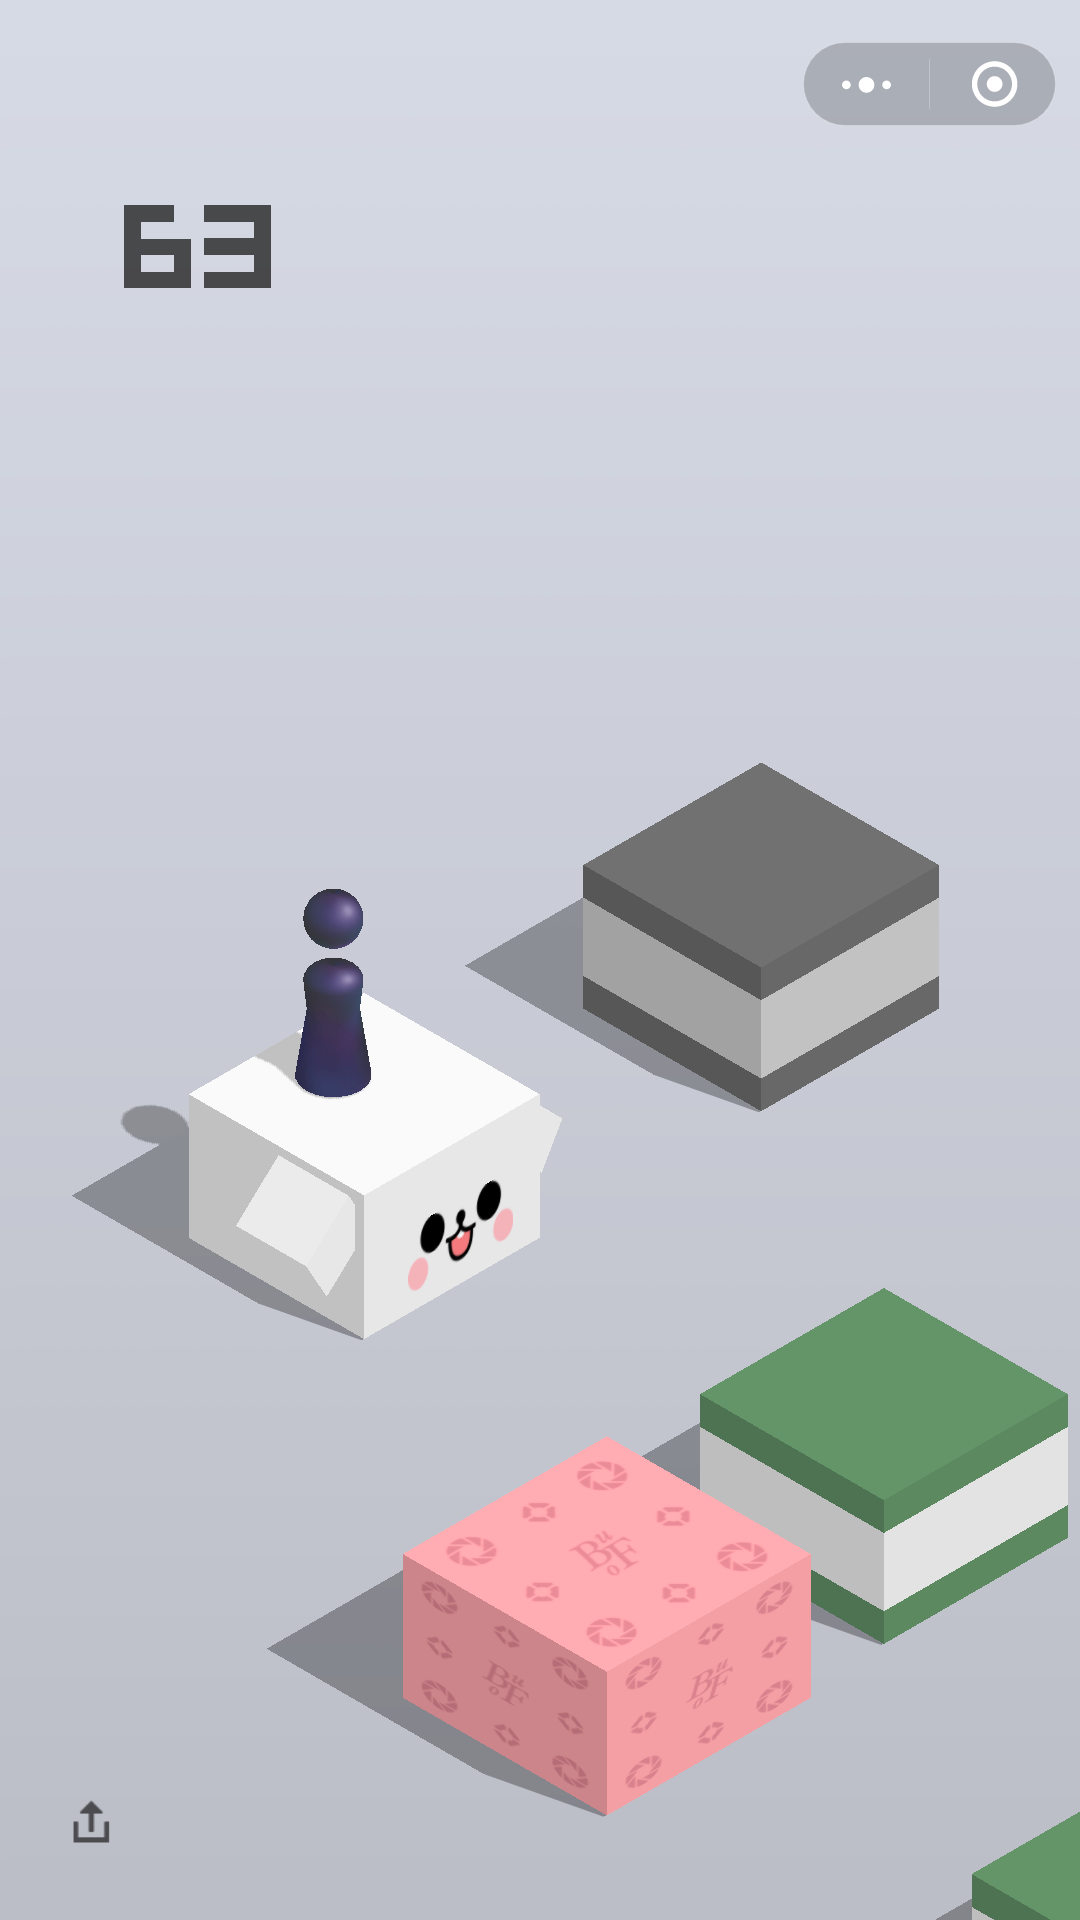

In [35]:
img

接下来可以在 PC 端使用 adb 工具来连接手机自动玩游戏啦（仅限安卓），写个脚本循环执行下列步骤
1. adb shell screencap -p /sdcard/screen.png // 进行截图  
2. adb pull /sdcard/screen.png . // 将截图拉取到本地  
3. 使用本文算法计算出 (tokenX, tokenY) 与 (boardX, boardY) 的距离 d  
4. 使用距离 d 乘以一个常数算得按压时间 t(ms)  
5. adb shell input swipe x y x y t(ms) // 模拟按压输入, x y 只要为有效屏幕坐标即可  